In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

In [32]:
np.median(df['price'])
df['price'].describe()

count    2.159500e+04
mean     5.402929e+05
std      3.673845e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
houses_under_500k = df.loc[df['price'] <= 500000]

In [5]:
houses_under_500k

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,4.0,0.0,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0,3.0,0.0,2.0
6,257500.0,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819,0,4.0,0.0,2.0
7,291850.0,3,1.50,1060,9711,1.0,1060,1963,0.0,98198,47.4095,-122.315,1650,9711,0,4.0,0.0,2.0
8,229500.0,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113,730,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,360000.0,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509,0,5.0,0.0,2.0
21591,400000.0,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200,0,5.0,0.0,2.0
21592,402101.0,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0,4.0,0.0,2.0
21593,400000.0,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0,5.0,0.0,2.0


In [7]:
above_500k = df.loc[df['price'] > 500000]

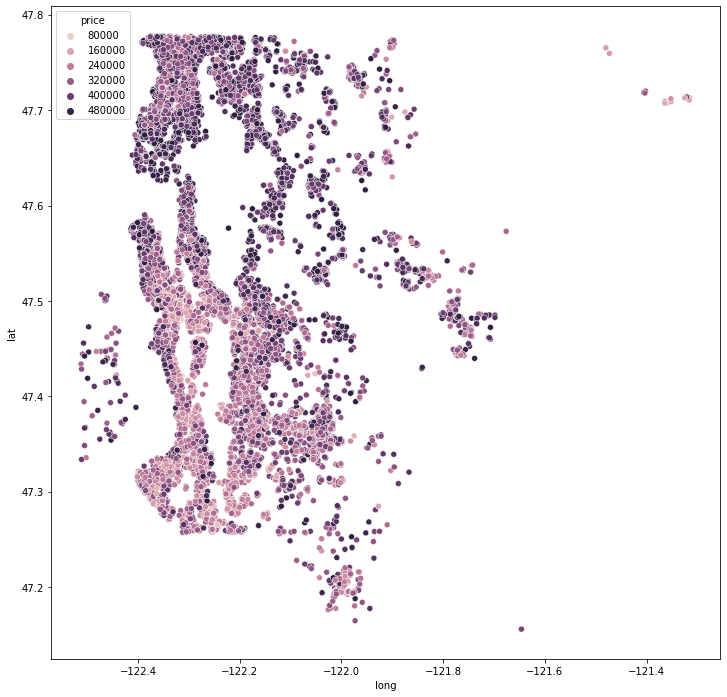

In [6]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k,
               hue='price');

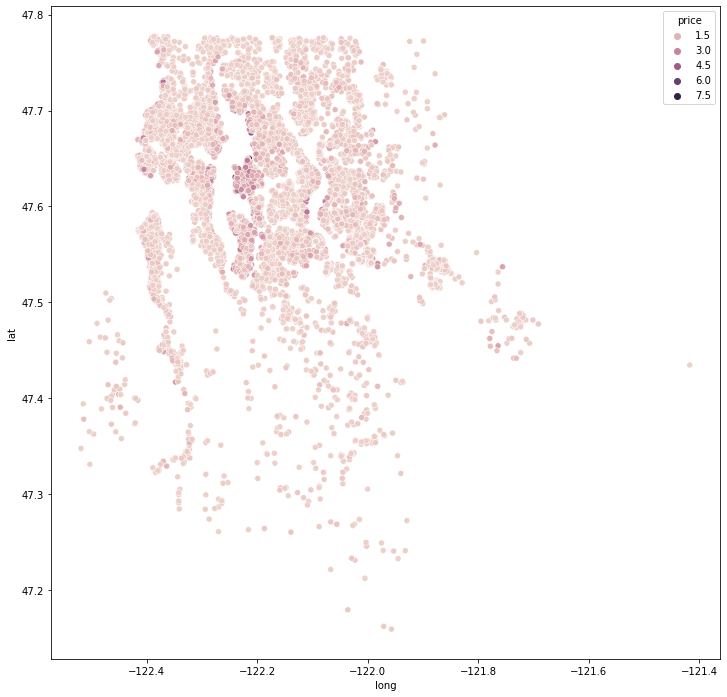

In [9]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k,
               hue='price',
               cmap='Oranges');

In [10]:
houses_under_500k['sqft_living'].describe()

count    12546.000000
mean      1668.947952
std        583.508820
min        370.000000
25%       1240.000000
50%       1600.000000
75%       2030.000000
max       5067.000000
Name: sqft_living, dtype: float64

In [11]:
above_500k['sqft_living'].describe()

count     9049.000000
mean      2650.621063
std        989.836522
min        680.000000
25%       1960.000000
50%       2520.000000
75%       3180.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [12]:
houses_under_500k['grades'].describe()

count    12546.000000
mean         4.113263
std          0.792555
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: grades, dtype: float64

In [13]:
above_500k['grades'].describe()

count    9049.000000
mean        5.413195
std         1.196816
min         2.000000
25%         5.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: grades, dtype: float64

In [18]:
houses_under_500k['zipcode'].value_counts().nlargest(10)

98042    523
98038    519
98023    477
98133    441
98058    420
98118    395
98034    382
98155    365
98001    347
98092    326
Name: zipcode, dtype: int64

In [17]:
#top value counts for above 500k, this tells us 80% of those houses in this zipcode are above ~500k
len(houses_under_500k.loc[houses_under_500k['zipcode'] == 98052])

139

In [19]:
above_500k['zipcode'].value_counts().nlargest(10)

98052    435
98006    420
98115    376
98103    365
98074    355
98075    340
98033    339
98117    334
98004    316
98053    291
Name: zipcode, dtype: int64

In [14]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
769,405000.0,3,2.50,3170,12750,2.0,2360,1995,0.0,98023,47.3384,-122.336,2970,13125,810,7.0,0.0,2.0
1218,475000.0,4,3.50,3660,14401,2.0,2660,1994,0.0,98023,47.3076,-122.396,2780,10653,1000,7.0,0.0,2.0
1980,402500.0,4,2.50,2600,11951,2.0,2600,1988,0.0,98023,47.3053,-122.340,2820,12093,0,7.0,0.0,2.0
3771,472500.0,4,2.50,2960,223462,2.0,2960,2001,0.0,98030,47.3646,-122.211,2770,16482,0,7.0,0.0,2.0
5388,425000.0,3,2.50,2670,13218,1.0,2670,1988,0.0,98042,47.3683,-122.153,1960,13130,0,7.0,0.0,3.0
6140,420000.0,4,2.50,2480,8626,2.0,2480,2001,0.0,98001,47.3185,-122.262,2990,9033,0,7.0,0.0,2.0
6283,490000.0,4,2.50,3020,8302,2.0,3020,1994,0.0,98042,47.3630,-122.127,3020,8406,0,7.0,0.0,3.0
6899,465000.0,3,2.50,2870,25663,2.0,2870,1988,0.0,98003,47.2769,-122.333,2950,24347,0,7.0,0.0,2.0
7147,475000.0,4,2.50,3740,8700,1.0,2260,2004,0.0,98058,47.4587,-122.117,2650,6333,1480,7.0,0.0,2.0
7378,450000.0,3,2.50,1990,3478,2.0,1520,1990,0.0,98199,47.6361,-122.399,1710,6157,470,7.0,0.0,2.0


In [20]:
houses_under_500k.loc[houses_under_500k['grades'] >= 7]

33

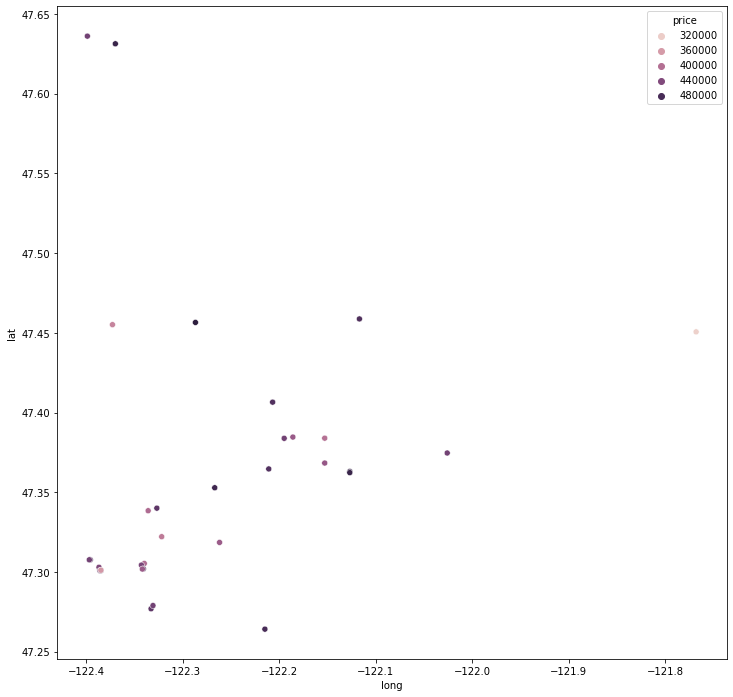

In [21]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k.loc[houses_under_500k['grades'] >= 7],
               hue='price');

In [23]:
above_500k.loc[above_500k['grades'] < 7]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0
10,662500.0,3,2.50,3560,9796,1.0,1860,1965,0.0,98007,47.6007,-122.145,2210,8925,1700,5.0,0.0,2.0
14,530000.0,5,2.00,1810,4850,1.5,1810,1900,0.0,98107,47.6700,-122.394,1360,4850,0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,541800.0,4,2.50,3118,7866,2.0,3118,2014,0.0,98001,47.2931,-122.264,2673,6500,0,6.0,0.0,2.0
21581,810000.0,4,3.00,3990,7838,2.0,3990,2003,0.0,98053,47.6857,-122.046,3370,6814,0,6.0,0.0,2.0
21585,507250.0,3,2.50,2270,5536,2.0,2270,2003,0.0,98065,47.5389,-121.881,2270,5731,0,5.0,0.0,2.0
21587,610685.0,4,2.50,2520,6023,2.0,2520,2014,0.0,98056,47.5137,-122.167,2520,6023,0,6.0,0.0,2.0


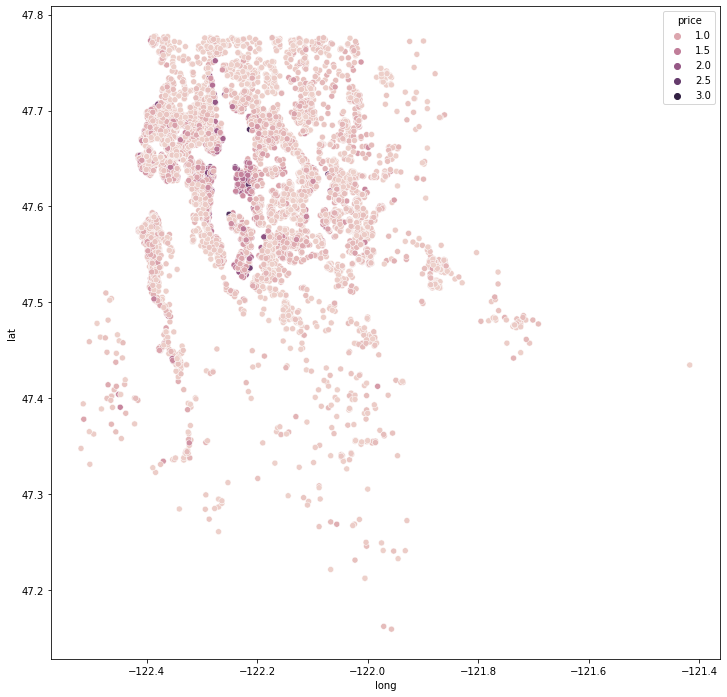

In [24]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=above_500k.loc[above_500k['grades'] < 7],
               hue='price');

In [27]:
houses_under_500k.loc[houses_under_500k['sqft_living'] > 2000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
22,285000.0,5,2.50,2270,6300,2.0,2270,1995,0.0,98092,47.3266,-122.169,2240,7005,0,5.0,0.0,2.0
24,329000.0,3,2.25,2450,6500,2.0,2450,1985,0.0,98030,47.3739,-122.172,2200,6865,0,5.0,0.0,3.0
34,322500.0,4,2.75,2060,6659,1.0,1280,1981,0.0,98058,47.4276,-122.157,2020,8720,780,4.0,0.0,2.0
45,488000.0,3,2.50,3160,13603,2.0,3160,2003,0.0,98019,47.7443,-121.977,3050,9232,0,5.0,0.0,2.0
51,345000.0,5,2.50,3150,9134,1.0,1640,1966,0.0,98056,47.4934,-122.189,1990,9133,1510,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21547,341780.0,4,2.75,2260,4440,2.0,2260,2014,0.0,98001,47.3507,-122.291,2260,4563,0,4.0,0.0,2.0
21557,399950.0,3,2.50,3087,5002,2.0,3087,2014,0.0,98023,47.2974,-122.349,2927,5183,0,5.0,0.0,2.0
21571,347500.0,3,2.50,2540,4760,2.0,2540,2010,0.0,98038,47.3452,-122.022,2540,4571,0,5.0,0.0,2.0
21576,350000.0,4,2.75,2500,5995,2.0,2500,2008,0.0,98042,47.3749,-122.107,2530,5988,0,5.0,0.0,2.0


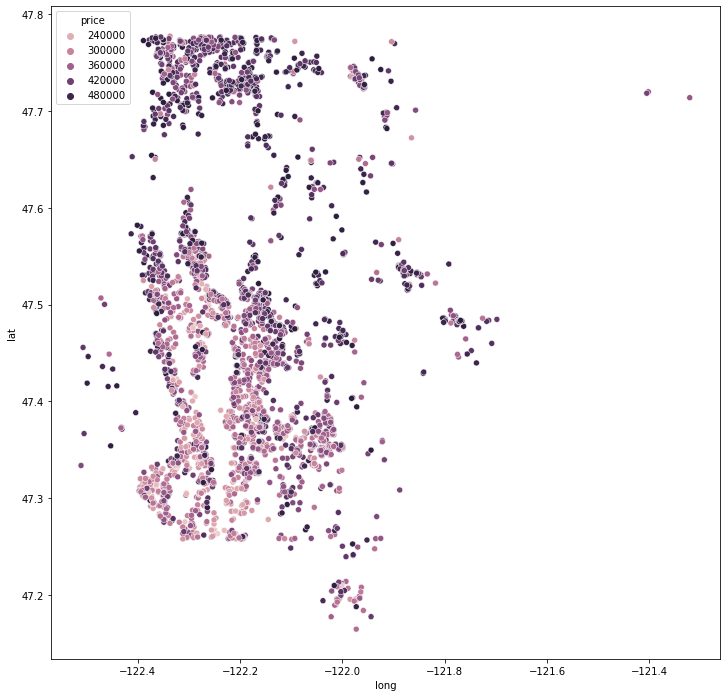

In [28]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=houses_under_500k.loc[houses_under_500k['sqft_living'] > 2000],
               hue='price');

In [37]:
target_df = df[df['price'].between(450000, 650000)]

In [38]:
target_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400,4.0,0.0,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910,4.0,0.0,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,5.0,0.0,2.0
11,468000.0,2,1.00,1160,6000,1.0,860,1942,0.0,98115,47.6900,-122.292,1330,6000,300,4.0,0.0,3.0
14,530000.0,5,2.00,1810,4850,1.5,1810,1900,0.0,98107,47.6700,-122.394,1360,4850,0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,541800.0,4,2.50,3118,7866,2.0,3118,2014,0.0,98001,47.2931,-122.264,2673,6500,0,6.0,0.0,2.0
21583,467000.0,3,2.50,1425,1179,3.0,1425,2008,0.0,98125,47.6963,-122.318,1285,1253,0,5.0,0.0,2.0
21585,507250.0,3,2.50,2270,5536,2.0,2270,2003,0.0,98065,47.5389,-121.881,2270,5731,0,5.0,0.0,2.0
21587,610685.0,4,2.50,2520,6023,2.0,2520,2014,0.0,98056,47.5137,-122.167,2520,6023,0,6.0,0.0,2.0


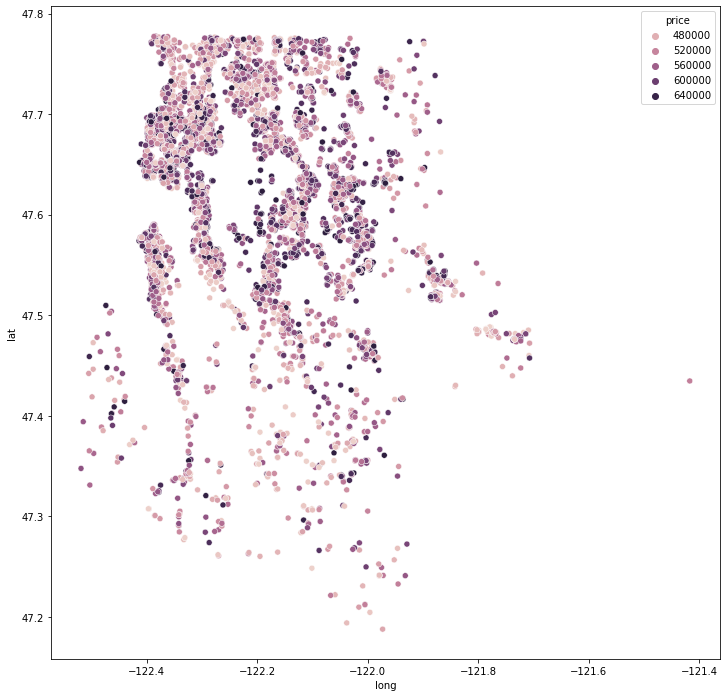

In [40]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='long',
               y='lat',
               data=target_df,
               hue='price');

In [41]:
target_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
count,5711.000000,5711.000000,5711.000000,5711.000000,5.711000e+03,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000,5711.000000
mean,540215.263176,3.401331,2.167703,2083.503940,1.599048e+04,1.530643,1753.637191,1970.913850,61.467694,98079.054106,47.615408,-122.208473,1996.076519,13624.058133,329.866748,4.700928,0.002451,2.404483
std,58055.213142,0.876043,0.641896,663.873774,4.045033e+04,0.558274,661.576692,30.878576,344.748743,49.059320,0.106716,0.150243,525.866713,29146.408496,429.814132,0.816767,0.049455,0.634066
min,450000.000000,1.000000,0.750000,680.000000,6.380000e+02,1.000000,480.000000,1900.000000,0.000000,98001.000000,47.187900,-122.519000,399.000000,794.000000,0.000000,2.000000,0.000000,0.000000
25%,490000.000000,3.000000,1.750000,1595.000000,4.528000e+03,1.000000,1250.000000,1950.000000,0.000000,98034.000000,47.553100,-122.341000,1580.000000,4650.000000,0.000000,4.000000,0.000000,2.000000
50%,537000.000000,3.000000,2.250000,2020.000000,7.200000e+03,1.500000,1590.000000,1977.000000,0.000000,98074.000000,47.636400,-122.225000,1930.000000,7200.000000,0.000000,5.000000,0.000000,2.000000
75%,587050.000000,4.000000,2.500000,2490.000000,1.072000e+04,2.000000,2180.000000,1998.000000,0.000000,98117.000000,47.690200,-122.109000,2360.000000,10050.000000,650.000000,5.000000,0.000000,3.000000
max,650000.000000,10.000000,7.500000,5461.000000,1.074218e+06,3.500000,5450.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.417000,4290.000000,438213.000000,2196.000000,8.000000,1.000000,4.000000


In [42]:
y = target_df['price']
X = target_df.drop('price', axis=1)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
relevant_columns = [    
 'bedrooms',    
 'bathrooms',  
 'sqft_living',  
 'sqft_lot',    
 'floors',    
 'waterfront', 
 'condition',
 'grades',
 'sqft_above',
 'sqft_basment_calc',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15'
]

In [46]:
X_train = X_train.loc[:, relevant_columns]

# Visually inspect X_train
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grades,sqft_above,sqft_basment_calc,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8086,3,2.00,2310,10525,2.0,0.0,4.0,4.0,2310,0,1965,0.0,98033,47.6727,-122.174,1430,10523
616,3,2.25,1490,9414,2.0,0.0,2.0,4.0,1490,0,1981,0.0,98052,47.6844,-122.113,1290,10125
2920,3,2.50,1910,4941,2.0,0.0,2.0,5.0,1910,0,1999,0.0,98075,47.5989,-122.016,1910,4941
6440,4,1.50,1340,6200,1.0,0.0,4.0,3.0,1340,0,1959,0.0,98008,47.6214,-122.119,1210,7178
15173,3,2.25,1620,12309,2.0,0.0,2.0,4.0,1620,0,1987,0.0,98074,47.6188,-122.029,2030,13963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14389,4,2.50,2360,10000,1.0,0.0,2.0,5.0,1980,380,1977,0.0,98126,47.5730,-122.374,2480,5000
19829,4,2.50,3250,4500,2.0,0.0,2.0,5.0,3250,0,2009,0.0,98059,47.4944,-122.149,3030,4518
19952,3,3.50,2710,3290,2.0,0.0,2.0,5.0,1650,1060,2006,0.0,98027,47.5367,-122.072,2440,3290
20513,3,2.50,1570,1452,2.5,0.0,2.0,6.0,1240,330,2007,0.0,98199,47.6480,-122.396,1670,1596


In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

cross_val_score(model, X_train, y_train, cv=3)

array([0.11958982, 0.13310562, 0.09226236])

In [50]:
X_test = X_test.loc[:, relevant_columns]

In [51]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.11064407203134619

In [ ]:
 sm.OLS(y, sm.add_constant(X)).fit()